In [1]:
import pandas as pd

# Load the dataset
file_path = 'transaction_anomalies_dataset.csv'
transaction_data = pd.read_csv(file_path)

# Check for null values
null_values = transaction_data.isnull().sum()
print("Null Values:\n", null_values)

# Get column information
column_info = transaction_data.info()

# Get descriptive statistics
descriptive_stats = transaction_data.describe()
print("\nDescriptive Statistics:\n", descriptive_stats)


Null Values:
 Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Da

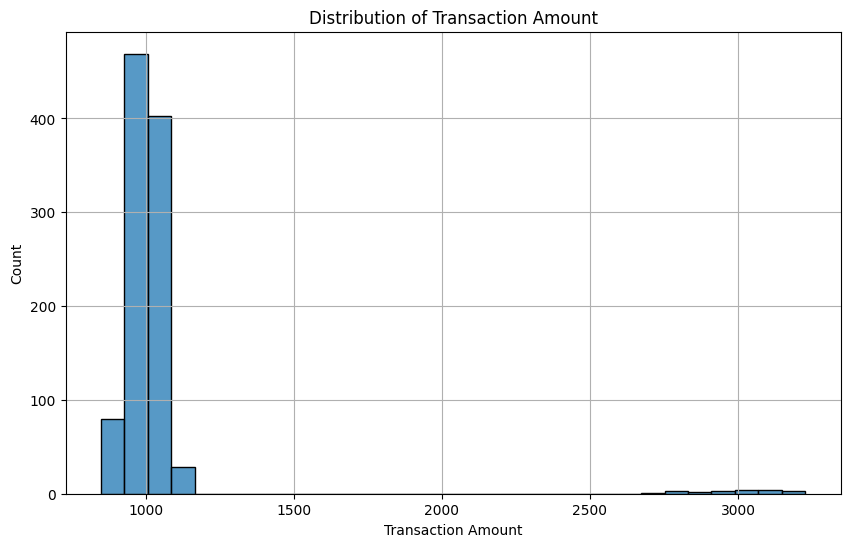

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of Transaction_Amount
plt.figure(figsize=(10, 6))
sns.histplot(transaction_data['Transaction_Amount'], bins=30)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.grid(True)
plt.show()


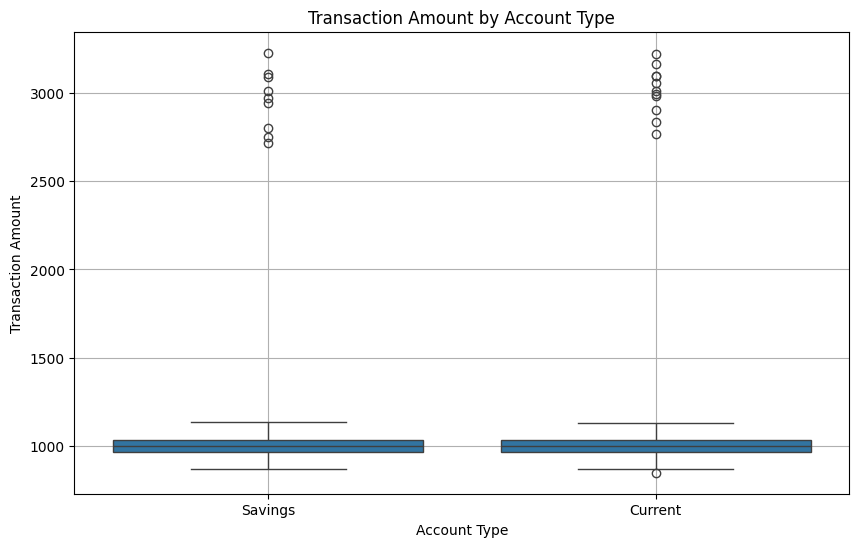

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of Transaction_Amount by Account_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Account_Type', y='Transaction_Amount', data=transaction_data)
plt.title('Transaction Amount by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()


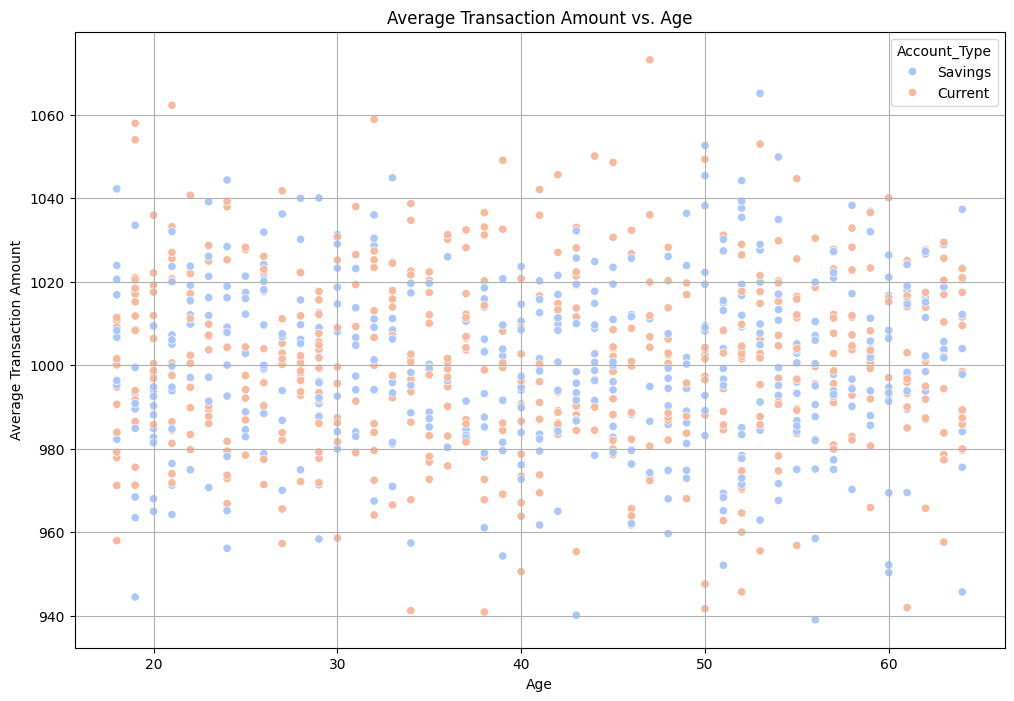

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Average Transaction Amount vs. Age, colored by Account_Type
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Average_Transaction_Amount', hue='Account_Type', data=transaction_data, palette='coolwarm')
plt.title('Average Transaction Amount vs. Age')
plt.xlabel('Age')
plt.ylabel('Average Transaction Amount')
plt.grid(True)
plt.show()


C:\Users\realh\AppData\Local\Temp\ipykernel_7592\1947866648.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day_of_Week', data=transaction_data, palette='Blues')


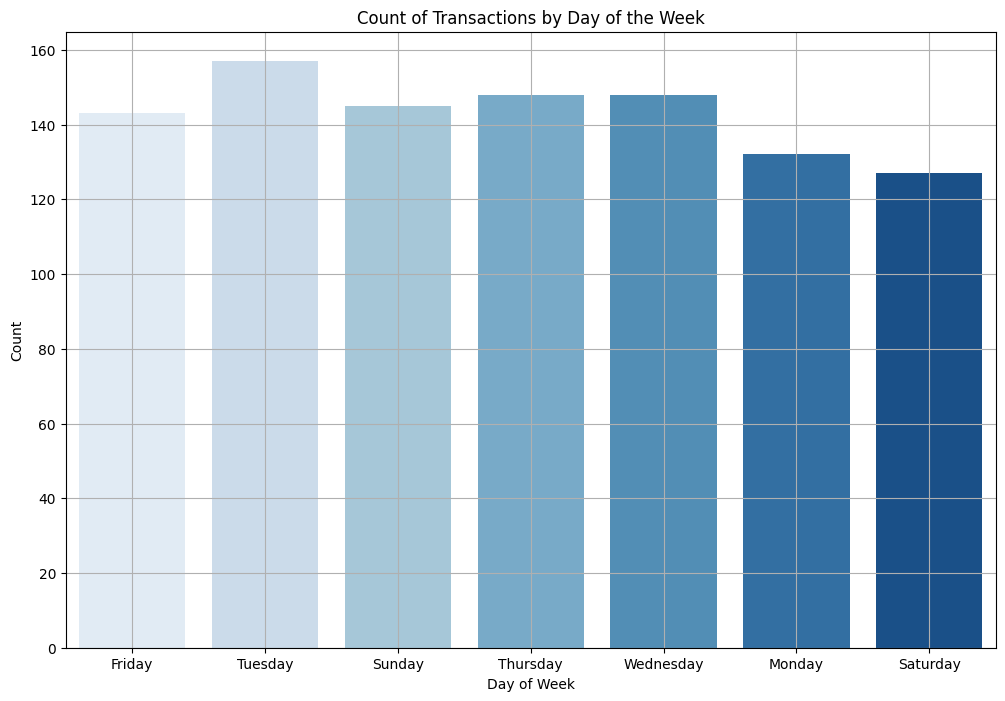

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the count of transactions by day of the week
plt.figure(figsize=(12, 8))
sns.countplot(x='Day_of_Week', data=transaction_data, palette='Blues')
plt.title('Count of Transactions by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.grid(True)
plt.show()


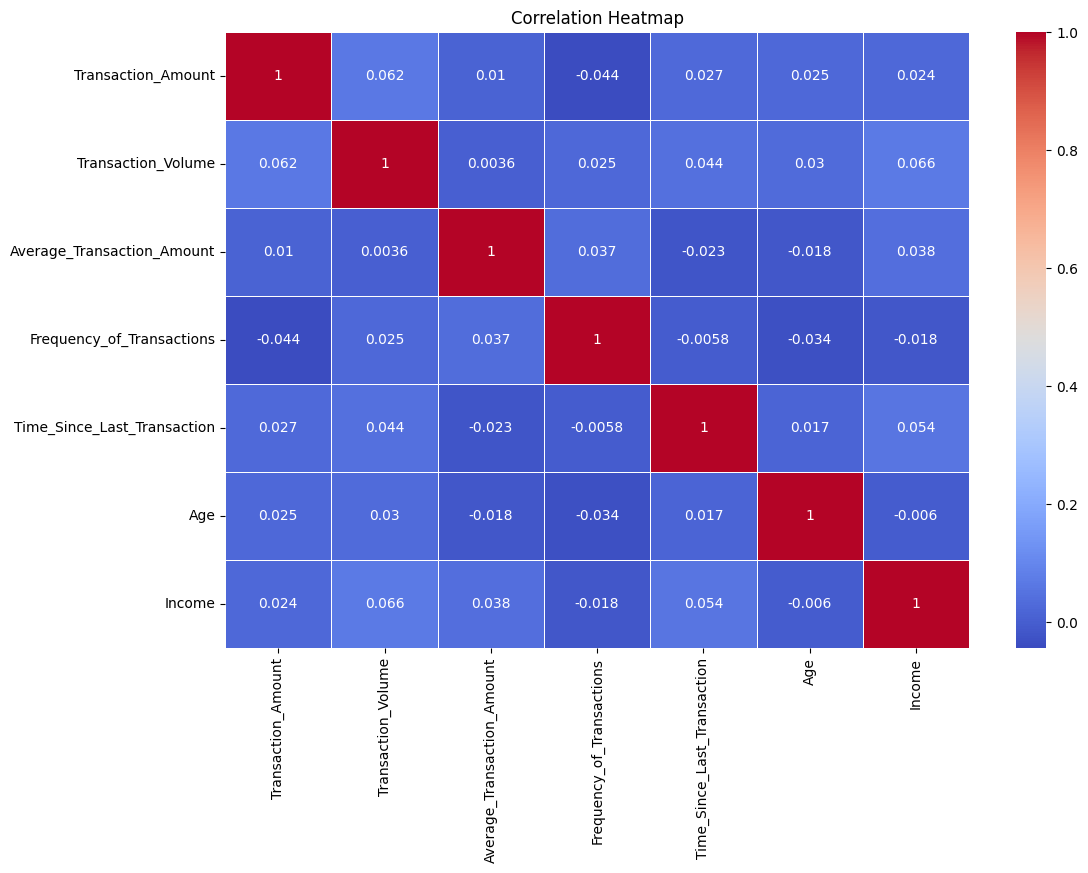

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only numeric columns for correlation matrix
numeric_columns = transaction_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = transaction_data[numeric_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


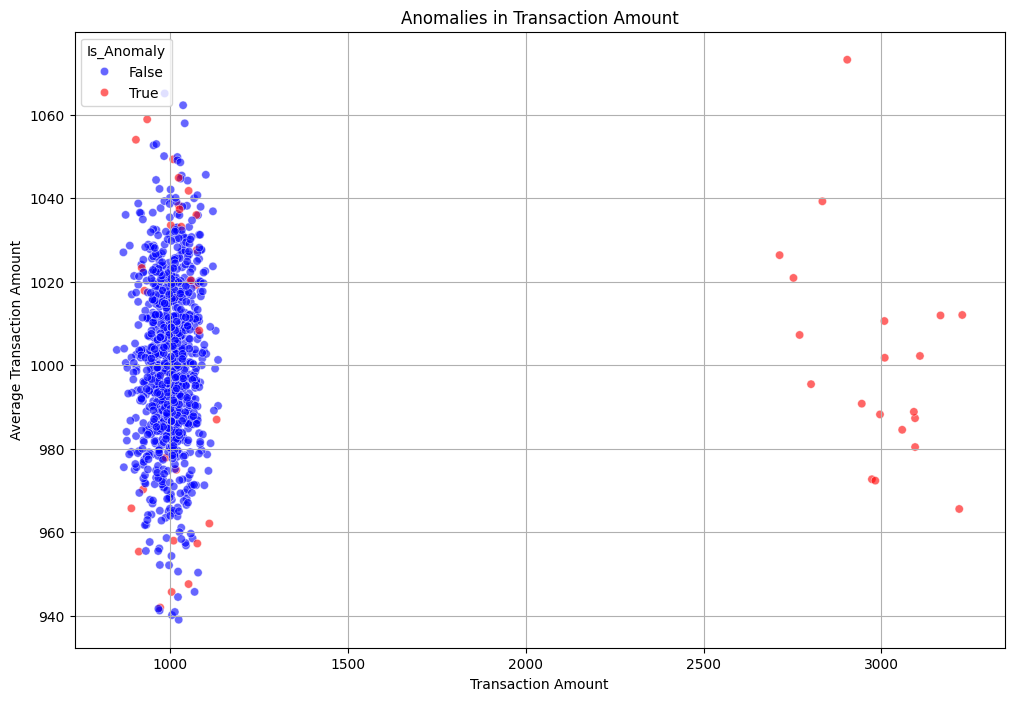

In [9]:
from sklearn.ensemble import IsolationForest

# Selecting numeric columns for the anomaly detection
numeric_columns = ['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount', 
                   'Frequency_of_Transactions', 'Time_Since_Last_Transaction', 'Age', 'Income']

# Applying Isolation Forest for anomaly detection
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
transaction_data['Is_Anomaly'] = isolation_forest.fit_predict(transaction_data[numeric_columns])

# Mapping anomaly labels to boolean
transaction_data['Is_Anomaly'] = transaction_data['Is_Anomaly'].map({1: False, -1: True})

# Plotting anomalies
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Transaction_Amount', y='Average_Transaction_Amount', hue='Is_Anomaly', 
                data=transaction_data, palette=['blue', 'red'], alpha=0.6)
plt.title('Anomalies in Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Average Transaction Amount')
plt.legend(title='Is_Anomaly', loc='upper left')
plt.grid(True)
plt.show()


In [10]:
# Calculate the number of anomalies
num_anomalies = transaction_data['Is_Anomaly'].sum()
total_transactions = len(transaction_data)
anomaly_ratio = num_anomalies / total_transactions

print(f"Number of Anomalies: {num_anomalies}")
print(f"Total Transactions: {total_transactions}")
print(f"Anomaly Ratio: {anomaly_ratio:.4f}")


Number of Anomalies: 50
Total Transactions: 1000
Anomaly Ratio: 0.0500


In [11]:


# Selecting relevant features for the model
features = ['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount', 
            'Frequency_of_Transactions', 'Time_Since_Last_Transaction', 'Age', 'Income']

# Fitting the Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
transaction_data['Is_Anomaly'] = isolation_forest.fit_predict(transaction_data[features])

# Converting predictions to binary values
transaction_data['Is_Anomaly'] = transaction_data['Is_Anomaly'].map({1: 0, -1: 1})

# Displaying the first few rows to verify the results
print(transaction_data[['Transaction_ID', 'Is_Anomaly']].head())


  Transaction_ID  Is_Anomaly
0            TX0           0
1            TX1           0
2            TX2           0
3            TX3           0
4            TX4           0


In [12]:
from sklearn.metrics import classification_report

# Generating the classification report
classification_rep = classification_report(transaction_data['Is_Anomaly'], transaction_data['Is_Anomaly'])
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       950
           1       1.00      1.00      1.00        50

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [16]:
def detect_anomaly():
    # Prompt the user to enter values
    transaction_amount = float(input("Enter the value for 'Transaction_Amount': "))
    avg_transaction_amount = float(input("Enter the value for 'Average_Transaction_Amount': "))
    frequency_of_transactions = int(input("Enter the value for 'Frequency_of_Transactions': "))

    # Create a DataFrame for the input values
    input_data = pd.DataFrame({
        'Transaction_Amount': [transaction_amount],
        'Transaction_Volume': [1],  # Placeholder value as it's not provided
        'Average_Transaction_Amount': [avg_transaction_amount],
        'Frequency_of_Transactions': [frequency_of_transactions],
        'Time_Since_Last_Transaction': [1],  # Placeholder value as it's not provided
        'Age': [30],  # Placeholder value as it's not provided
        'Income': [50000]  # Placeholder value as it's not provided
    })
    
    # Predict using the isolation forest model
    prediction = isolation_forest.predict(input_data)
    
    # Convert prediction to human-readable format
    is_anomaly = "Anomaly detected: This transaction is flagged as an anomaly." if prediction[0] == -1 else "No anomaly detected: This transaction is normal."
    
    # Display the result
    print(f"\nEnter the value for 'Transaction_Amount': {transaction_amount}")
    print(f"Enter the value for 'Average_Transaction_Amount': {avg_transaction_amount}")
    print(f"Enter the value for 'Frequency_of_Transactions': {frequency_of_transactions}")
    print(is_anomaly)

# Run the function to prompt user for input and detect anomalies
detect_anomaly()



Enter the value for 'Transaction_Amount': 1000.0
Enter the value for 'Average_Transaction_Amount': 900.0
Enter the value for 'Frequency_of_Transactions': 6
Anomaly detected: This transaction is flagged as an anomaly.
